In [1]:
import pandas as pd
import matplotlib as mlp
from matplotlib import pyplot as plt
import numpy as np

In [2]:
Accra=pd.read_fwf('C:/Users/USER/Desktop/OneQuantum-Ghana-main/GAUGE_PRECIP/Accra_1983_2017_dRR_gapless.txt', names=['Year','Month','Day','Rainfall'])
Kete=pd.read_fwf('C:/Users/USER/Desktop/OneQuantum-Ghana-main/GAUGE_PRECIP/Kete_Krachi_1983_2017_dRR_gapless.txt', names=['Year','Month','Day','Rainfall'])
kumasi=pd.read_fwf('C:/Users/USER/Desktop/OneQuantum-Ghana-main/GAUGE_PRECIP/Kumasi_1983_2017_dRR_gapless.txt', names=['Year','Month','Day','Rainfall'])
Wa=pd.read_fwf('C:/Users/USER/Desktop/OneQuantum-Ghana-main/GAUGE_PRECIP/Wa_1983_2017_dRR_gapless.txt', names=['Year','Month','Day','Rainfall'])

In [3]:
# creating datetime column named Date

Accra['Date'] = pd.to_datetime(Accra[['Year','Month','Day']])
Kete['Date'] = pd.to_datetime(Kete[['Year','Month','Day']])
kumasi['Date'] = pd.to_datetime(kumasi[['Year','Month','Day']])
Wa['Date'] = pd.to_datetime(Wa[['Year','Month','Day']])

In [4]:
# setting Date as index

ac=Accra[['Rainfall','Date']].set_index('Date')
ke=Kete[['Rainfall','Date']].set_index('Date')
ku=kumasi[['Rainfall','Date']].set_index('Date')
wa=Wa[['Rainfall','Date']].set_index('Date')

In [5]:
# annual total rainfall calculation

actotal=ac.resample('y').sum()
wtotal=wa.resample('y').sum()
ketotal=ke.resample('y').sum()
kutotal=ku.resample('y').sum()

In [6]:
# anomaly calculation function
def ano (data):
    mean=np.mean(data)
    anomaly=data-mean
    return anomaly

In [7]:
Ac=ano(actotal)
Ke=ano(ketotal)
Ku=ano(kutotal)
wA=ano(wtotal)

C:\Users\USER\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [8]:
wA

,Rainfall
Date,
1983-12-31,-314.880857
1984-12-31,-48.480857
1985-12-31,75.519143
1986-12-31,-462.280857
1987-12-31,-208.580857
1988-12-31,-54.680857
1989-12-31,57.119143
1990-12-31,-78.880857
1991-12-31,22.619143


Text(0.5, 1.0, 'Annual Rainfall Total for all Stations')

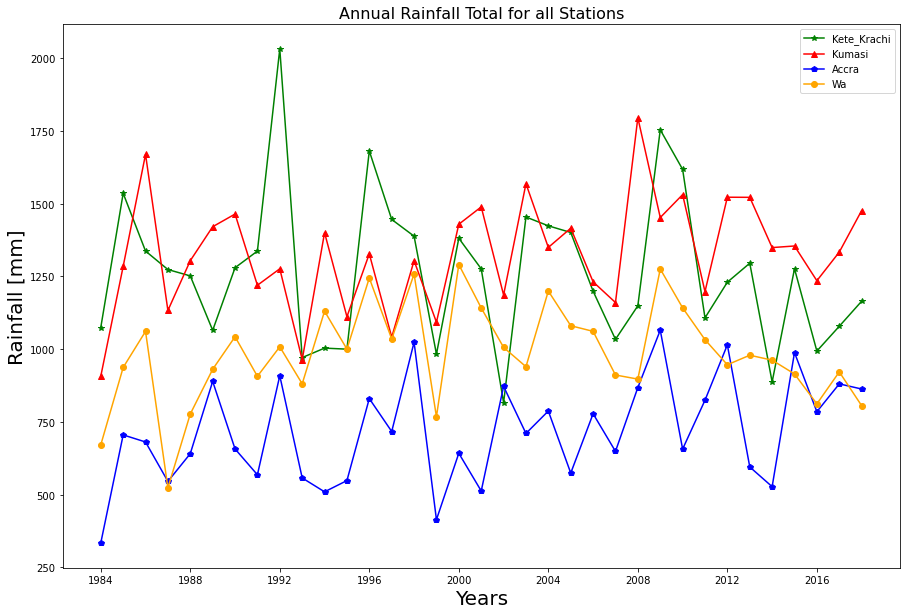

In [9]:
fig=plt.figure(figsize=(15,10))

plt.plot(ketotal,color='green', label ='Kete_Krachi', marker='*')
plt.plot(kutotal, color='red', label= 'Kumasi', marker='^')
plt.plot(actotal, color='blue', label= 'Accra', marker='p')
plt.plot(wtotal, color='orange', label= 'Wa', marker='o')

plt.legend()

plt.xlabel('Years',fontsize=20)
plt.ylabel('Rainfall [mm]', fontsize=20)
plt.title('Annual Rainfall Total for all Stations', fontsize=16)

Text(0.5, 1.0, 'Annual Rainfall Anomalies for Accra')

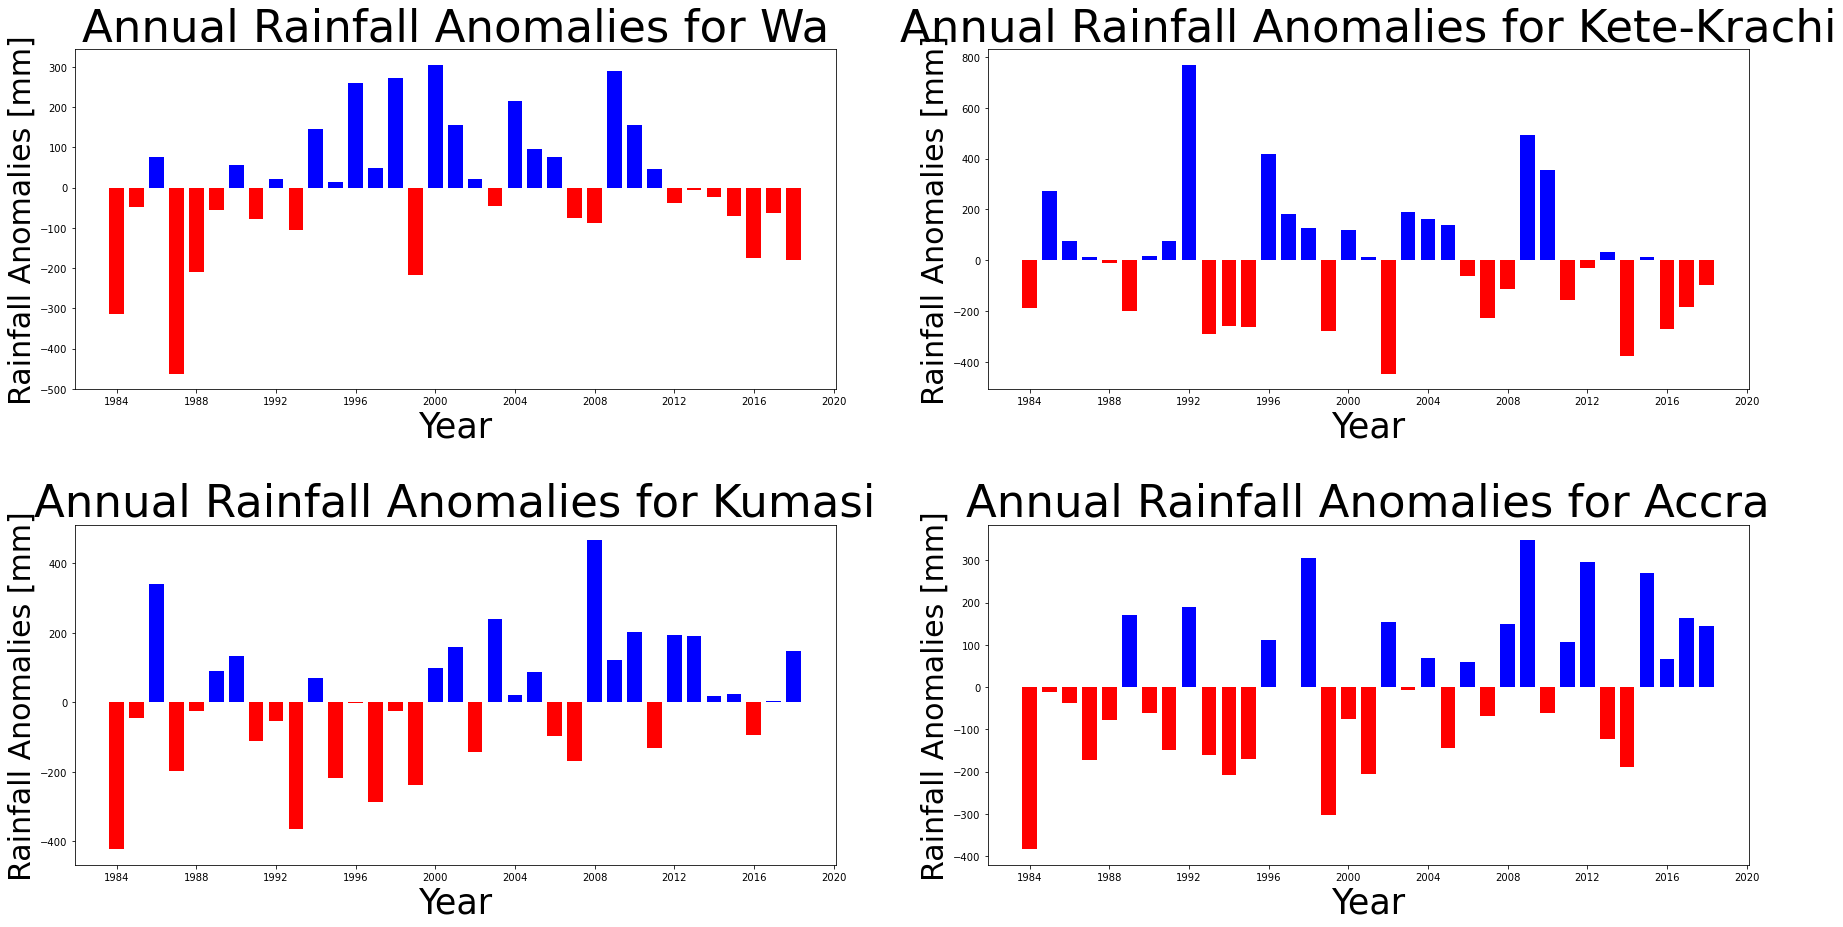

In [10]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(30, 15))

#increasing height space between columns
plt.subplots_adjust(hspace=0.4)

# Generating bars with color schemes

ax1 = axes[0,0]
wA["color"] = np.where(wA["Rainfall"]<0, 'red', 'blue')
ax1.bar(wA.index, wA.Rainfall, color=wA.color, width=270)

#labeling the bars 
ax1.set_xlabel("Year", fontsize=35)
ax1.set_ylabel("Rainfall Anomalies [mm]", fontsize=30)
ax1.set_title('Annual Rainfall Anomalies for Wa',fontsize=45)

ax2 = axes[0,1]
Ke["color"] = np.where(Ke["Rainfall"]<0, 'red', 'blue')
ax2.bar(Ke.index, Ke.Rainfall, color=Ke.color, width=270)

#labeling the bars
ax2.set_xlabel("Year", fontsize=35)
ax2.set_ylabel("Rainfall Anomalies [mm]", fontsize=30)
ax2.set_title('Annual Rainfall Anomalies for Kete-Krachi',fontsize=45)

ax3 = axes[1,0]
Ku["color"] = np.where(Ku["Rainfall"]<0, 'red', 'blue')
ax3.bar(Ku.index, Ku.Rainfall, color=Ku.color, width=270)

#labeling the bars
ax3.set_xlabel("Year", fontsize=35)
ax3.set_ylabel("Rainfall Anomalies [mm]", fontsize=30)
ax3.set_title('Annual Rainfall Anomalies for Kumasi',fontsize=45)

ax4 = axes[1,1]
Ac["color"] = np.where(Ac["Rainfall"]<0, 'red', 'blue')
ax4.bar(Ac.index, Ac.Rainfall, color=Ac.color, width=270)

#labeling the bars
ax4.set_xlabel("Year", fontsize=35)
ax4.set_ylabel("Rainfall Anomalies [mm]", fontsize=30)
ax4.set_title('Annual Rainfall Anomalies for Accra',fontsize=45)